In [1]:
!pip install -r requirements.txt


In [2]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Dataset import
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#Show train dataset
train

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,252000.0
1,Not Placed,F,70.50,Central,62.50,Others,Commerce,61.00,Comm&Mgmt,No,93.91,Mkt&Fin,69.03,NaN
2,Not Placed,M,52.00,Others,50.00,Others,Arts,61.00,Comm&Mgmt,No,60.00,Mkt&Fin,58.52,NaN
3,Placed,F,74.90,Others,57.00,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,360000.0
4,Placed,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.00,Mkt&Fin,60.39,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Placed,F,85.00,Others,90.00,Others,Commerce,82.00,Comm&Mgmt,No,92.00,Mkt&Fin,68.03,300000.0
133,Placed,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,360000.0
134,Not Placed,F,63.30,Central,78.33,Others,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,74.56,NaN
135,Placed,F,73.96,Others,79.00,Others,Commerce,67.00,Comm&Mgmt,No,72.15,Mkt&Fin,63.08,280000.0


In [5]:
#Show test dataset
test

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,216000.0
1,Not Placed,M,52.00,Others,65.00,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,NaN
2,Placed,M,65.00,Central,71.50,Others,Commerce,62.80,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60,265000.0
3,Placed,F,61.00,Central,81.00,Central,Commerce,66.40,Comm&Mgmt,No,50.89,Mkt&HR,62.21,278000.0
4,Placed,F,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,250000.0
5,Placed,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,360000.0
6,Placed,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,400000.0
7,Placed,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,380000.0
8,Placed,F,66.50,Central,66.80,Central,Arts,69.30,Comm&Mgmt,Yes,80.40,Mkt&Fin,71.00,236000.0
9,Placed,F,72.00,Others,60.00,Others,Science,69.00,Comm&Mgmt,No,55.50,Mkt&HR,58.40,250000.0


Verifico graficamente la distribuzione degli studenti sulla base della feature 'status'

Placed        90
Not Placed    47
Name: status, dtype: int64


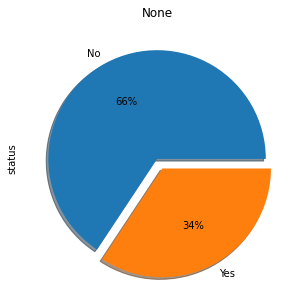

In [6]:
def plot_target_distribution(target):
    status_value_counts = target.value_counts()
    print(status_value_counts)
    plot = status_value_counts.plot.pie(
        figsize = (5, 5),
        explode = (0, 0.1),
        shadow = True,
        autopct = '%1.0f%%',
        labels = ['No', 'Yes'],
        title = 'None'
    )

plot_target_distribution(train['status'])

**Verifica di elementi nulli sul dataset**

In [7]:
#Checking missing values on train + test set
def get_cols_with_missing(train, test):
    
    return {
        col: (train[col].isnull().sum() + test[col].isnull().sum())
        for col in train.columns
        if train[col].isnull().any() or test[col].isnull().any()
    }

get_cols_with_missing(train, test)

{'salary': 55}

In [8]:
#Checking missing values on train set
missing_values_count = train['salary'].isnull().sum()
missing_values_count

47

In [9]:
#Checking missing values on test set
missing_values_count = test['salary'].isnull().sum()
missing_values_count

8

In [10]:
#Filling missing values with remaining values' mean on train set
train['salary'] = train['salary'].replace(np.NaN, 0)
train['salary']

0      252000.0
1           0.0
2           0.0
3      360000.0
4      300000.0
         ...   
132    300000.0
133    360000.0
134         0.0
135    280000.0
136    300000.0
Name: salary, Length: 137, dtype: float64

In [11]:
#Filling missing values with remaining values' mean on test set
test['salary'] = test['salary'].replace(np.NaN, 0)
test['salary']

0     216000.0
1          0.0
2     265000.0
3     278000.0
4     250000.0
5     360000.0
6     400000.0
7     380000.0
8     236000.0
9     250000.0
10    260000.0
11         0.0
12    250000.0
13    218000.0
14    240000.0
15    200000.0
16    350000.0
17    940000.0
18         0.0
19    450000.0
20         0.0
21    216000.0
22         0.0
23    240000.0
24    275000.0
25         0.0
26    250000.0
27    210000.0
28    240000.0
29    300000.0
30         0.0
31    240000.0
32         0.0
33    240000.0
34    236000.0
Name: salary, dtype: float64

In [12]:
#Verify Dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          137 non-null    object 
 1   gender          137 non-null    object 
 2   ssc_p           137 non-null    float64
 3   ssc_b           137 non-null    object 
 4   hsc_p           137 non-null    float64
 5   hsc_b           137 non-null    object 
 6   hsc_s           137 non-null    object 
 7   degree_p        137 non-null    float64
 8   degree_t        137 non-null    object 
 9   workex          137 non-null    object 
 10  etest_p         137 non-null    float64
 11  specialisation  137 non-null    object 
 12  mba_p           137 non-null    float64
 13  salary          137 non-null    float64
dtypes: float64(6), object(8)
memory usage: 15.1+ KB


**Analisi della feature 'gender'**

In [13]:
#Distribution count
train.gender.value_counts()


M    91
F    46
Name: gender, dtype: int64

Gli uomini sono quasi il doppio rispetto alle donne, vediamo la distribuzione di 'status' sulla base del sesso:



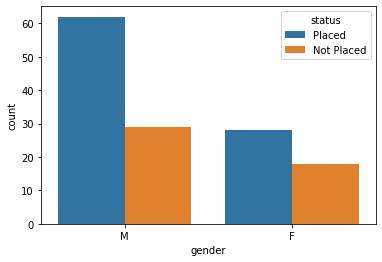

In [14]:
sns.countplot(x=train['gender'], hue='status', data=train)
plt.show()

Le possibilità di impiego per le donne sono evidentemente molto più limitate rispetto a quelle per gli uomini.

**Analisi della feature 'workex'**

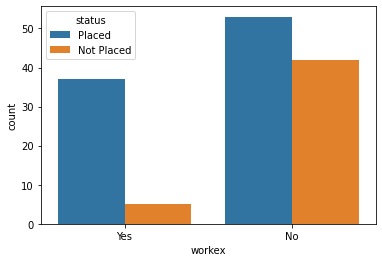

In [15]:
sns.countplot(x=train['workex'], hue='status', data=train)
plt.show()

La percentuale di impiego per studenti che hanno già avuto una esperienza lavorativa è molto alta.

**Analisi della feature 'specialisation'**

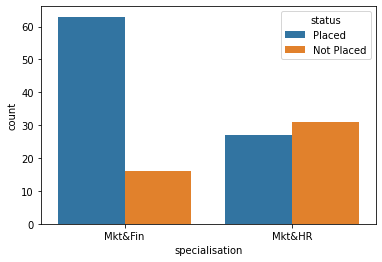

In [16]:
sns.countplot(x=train['specialisation'], hue='status', data=train)
plt.show()

La specializzazione in Mkt&Fin offre molte più opportunità lavorative.

**Feature enconding**

In [17]:
lEncoder = preprocessing.LabelEncoder()

for l in train:
   if ((l=='status') or (l=='gender') or (l=='workex') or (l=='specialisation') or (l=='ssc_b') or (l=='hsc_b') or (l=='degree_t') or (l=='hsc_s')):
      train[l]=lEncoder.fit_transform(train[l].astype(str))
      test[l]=lEncoder.fit_transform(test[l].astype(str))

In [18]:
#Show encoded train dataset
train

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,252000.0
1,0,0,70.50,0,62.50,1,1,61.00,0,0,93.91,0,69.03,0.0
2,0,1,52.00,1,50.00,1,0,61.00,0,0,60.00,0,58.52,0.0
3,1,0,74.90,1,57.00,1,2,62.00,1,1,80.00,0,60.78,360000.0
4,1,1,77.67,1,64.89,1,1,70.67,0,0,89.00,0,60.39,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1,0,85.00,1,90.00,1,1,82.00,0,0,92.00,0,68.03,300000.0
133,1,1,76.50,1,97.70,1,2,78.86,2,0,97.40,0,74.01,360000.0
134,0,0,63.30,0,78.33,1,1,74.00,0,0,80.00,0,74.56,0.0
135,1,0,73.96,1,79.00,1,1,67.00,0,0,72.15,0,63.08,280000.0


In [19]:
#Show encoded test dataset
test

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,62.00,0,72.00,0,1,65.00,0,0,67.00,0,56.49,216000.0
1,0,1,52.00,1,65.00,1,0,57.00,1,1,75.00,0,59.81,0.0
2,1,1,65.00,0,71.50,1,1,62.80,0,1,57.00,0,56.60,265000.0
3,1,0,61.00,0,81.00,0,1,66.40,0,0,50.89,1,62.21,278000.0
4,1,0,77.44,0,92.00,1,1,72.00,0,1,94.00,0,67.13,250000.0
5,1,0,69.80,1,60.80,1,2,72.23,2,0,55.53,1,68.81,360000.0
6,1,1,80.60,1,82.00,1,1,77.60,0,0,91.00,0,74.49,400000.0
7,1,1,63.00,0,72.00,0,1,68.00,0,0,78.00,1,60.44,380000.0
8,1,0,66.50,0,66.80,0,0,69.30,0,1,80.40,0,71.00,236000.0
9,1,0,72.00,1,60.00,1,2,69.00,0,0,55.50,1,58.40,250000.0


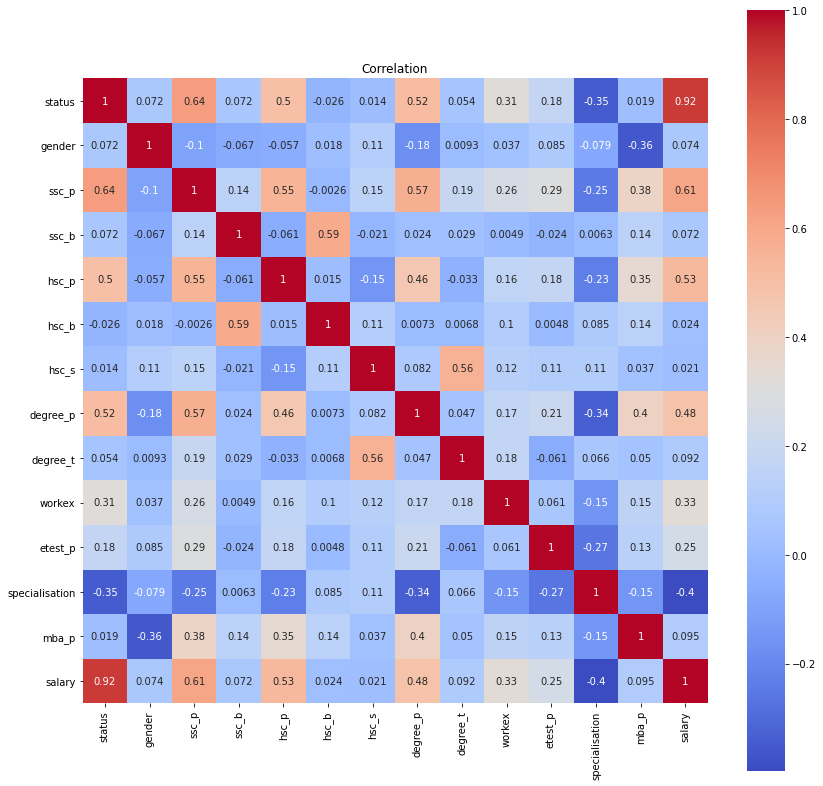

In [20]:
#Correlation Graphic on training set
correlation = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation')
plt.show()

**Analisi della feature 'salary'**

L'alta correlazione tra le feature "salary" e "status" ci suggerisce che i valori nulli del salario sono da attribuire alle sole persone disoccupate, verifichiamo:

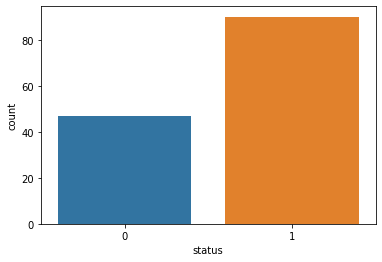

In [21]:
#Data distribution based on 'status' label
sns.countplot(x = 'status', data = train)
plt.show();

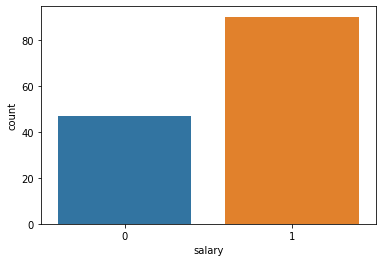

In [22]:
#Data distribution based on 'salary' label
sns.countplot(x = train["salary"].map(lambda x : 1 if x!=0 else 0), data = train)
plt.show();

Accorpo i valori di 'salary' diversi da zero e verifico la distribuzione rispetto alla feature 'status'.

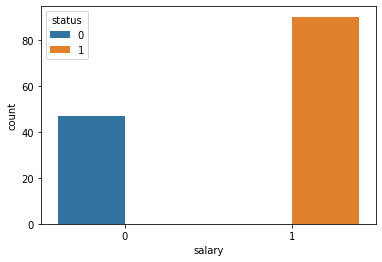

In [23]:
sns.countplot(x = train["salary"].map(lambda x : 1 if x!=0 else 0), hue="status", data = train)
plt.show()

Come intuito i valori nulli di salario sono da attribuire interamente agli studenti che non hanno ricevuto una offerta lavorativa pertanto possiamo procedere a rimuovere la feature 'salary' poichè il suo potere discriminante è nullo ai fini della previsione.

In [24]:
#Dropping features in training set
train = train.drop('salary', axis=1)

#Dropping features in test set
test = test.drop('salary', axis=1)

**Analisi dei voti ottenuti durante il percorso di istruzione**

Dal grafico della correlazione noto che per tutte le feature relative ai voti di uscita dai diversi gradi di istruzione ci sono valori significativi di correlazione. Vediamo graficamente la corrispondenza con la feature 'status'.

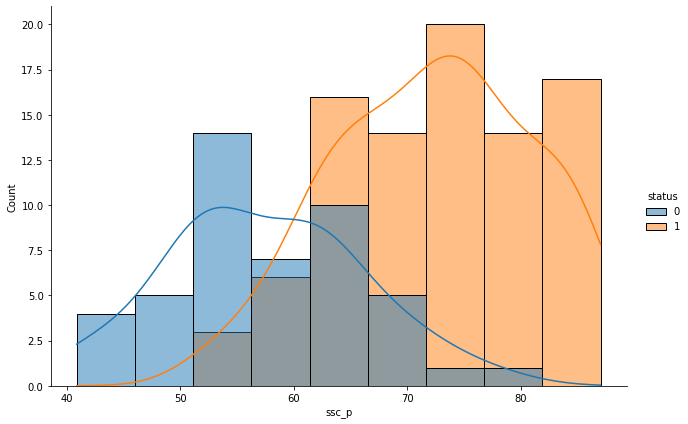

In [25]:
#Visualizzazione distribuzione voto delle medie
sns.displot(data=train, x="ssc_p", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

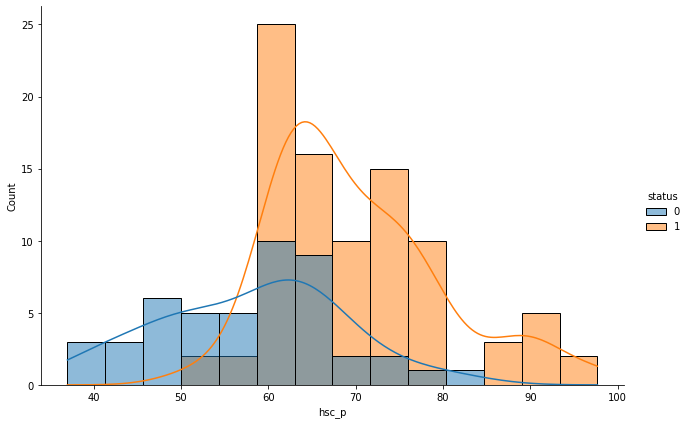

In [26]:
#Visualizzazione distribuzione punteggio del diploma
sns.displot(data=train, x="hsc_p", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

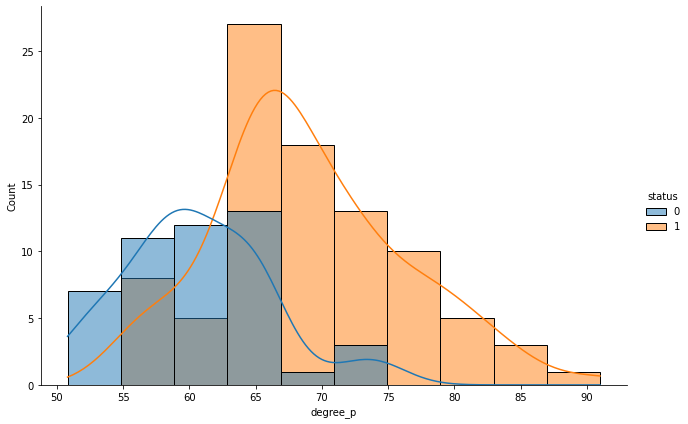

In [27]:
#Visualizzazione distribuzione voto di laurea
sns.displot(data=train, x="degree_p", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Dai grafici si evince che al crescere dei punteggi di uscita dai vari gradi di istruzione corrisponde una maggiore possibilità di ottenere un impiego.

**Analisi delle feature 'ssc_b' e 'hsc_b'**

Per le feature 'ssc_b' e 'hsc_b' abbiamo dei valori di correlazione poco significativi, cerchiamo una corrispondenza grafico con la feature 'status'.

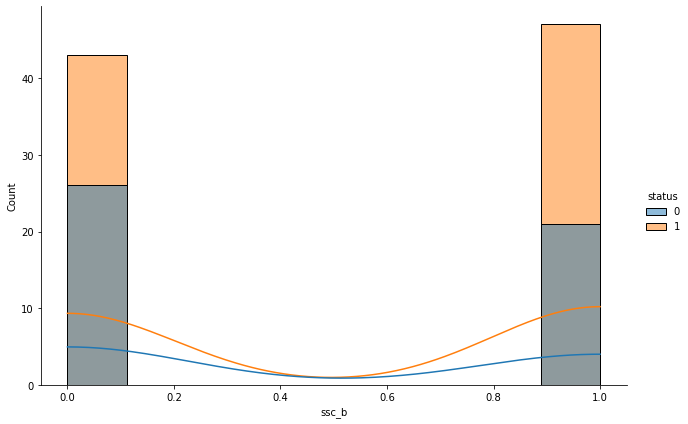

In [28]:
#Visualizzazione distribuzione ssc_b
sns.displot(data=train, x="ssc_b", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

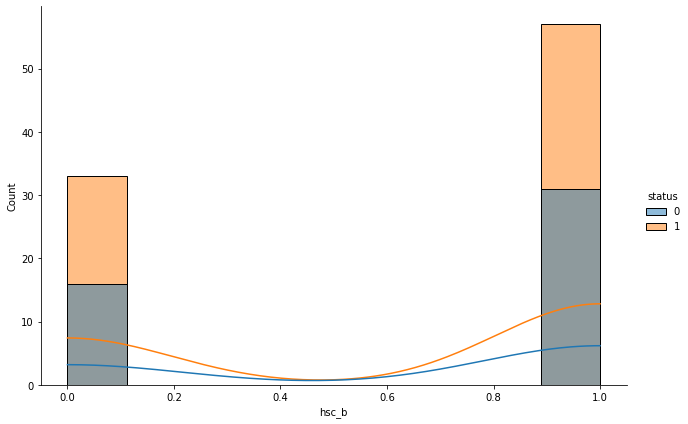

In [29]:
#Visualizzazione distribuzione hsc_b
sns.displot(data=train, x="hsc_b", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Le due feature non sembrano avere una particolare significatività sulla possibilità di impiego, le elimino.

In [30]:
#Dropping features in training set
train = train.drop('ssc_b', axis=1)
train = train.drop('hsc_b', axis=1)

#Dropping features in test set
test = test.drop('hsc_b', axis=1)
test = test.drop('ssc_b', axis=1)

**Analisi della feature 'etest_p'**

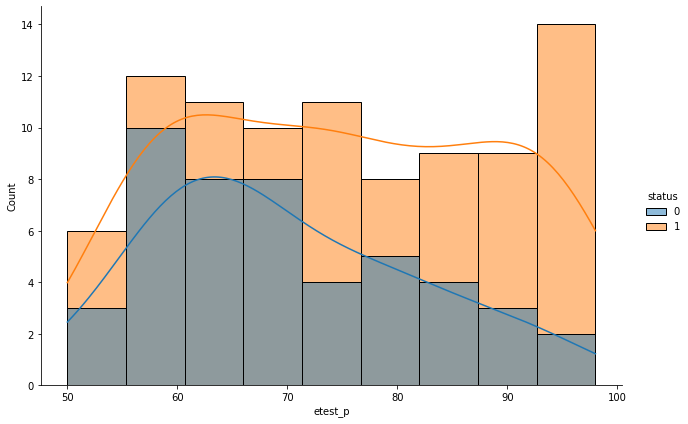

In [31]:
#Visualizzazione distribuzione etest_p
sns.displot(data=train, x='etest_p', hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Al crescere del voto di specializzazione le possibilità di impiego degli studenti aumentano sensibilmente.

**Previsione:**

La dimensione ridotta del dataset rischia di compromettere la qualità del modello.

Divido la label 'Exited' dal training set e test set per applicare l'algoritmo di ML.

In [32]:
#Divide
trainY=train['status']
testY=test['status']
trainX=train.drop('status', axis=1)
testX=test.drop('status', axis=1)

Applico il modello RandomForestClassifier che calcola una moltitudine di Decision Trees e tramite la media dei risultati ottenuti fa la previsione.

In [33]:
#Model training and score
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 91.42857142857143 %


**Analisi della previsione**

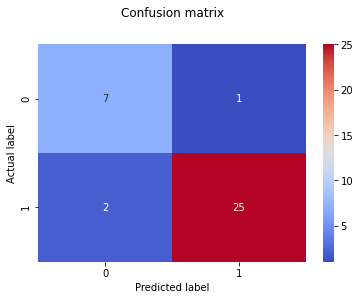

In [34]:
#Confusion Matrix
predY = forest.predict(testX)

cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

Dalla matrice di confusione notiamo che la maggior parte degli errori sono stati compiuti sugli studenti che non hanno ricevuto alcuna offerta lavorativa.